In [71]:
import sys
sys.path.append("..") # this adds to path parent directory in order to import utils file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from tqdm import tqdm
import numpy as np
import os
import seaborn as sns
plt.ion()
plt.show()

## Utils functions

In [74]:
def getResultsDataset(datasets, method = 'louvain'):
    results = []
    for dataset in datasets:
        if method == 'louvain':
            resultsFile = f'{dataset}_louvain_results.pkl'
            results.append(pd.read_pickle(resultsFile))
    results = pd.concat(results)
    return results

def plotResults(results, randIndexColumn= '_rand_index', datasetColumn = 'dataset'):
    def plotFeature(column, randIndexColumn, datasetColumn):
        if np.issubdtype(results[column].dtype, np.number):
            g = sns.FacetGrid(results, col=datasetColumn, margin_titles=True, height=3)
            g.map(sns.kdeplot, column, randIndexColumn);
        else:
            g = sns.catplot(x=column, y=randIndexColumn, hue=datasetColumn,
                            data=results, kind = 'violin', height = 4, aspect=1.35);
            plt.xticks(rotation = 90);

        g.fig.suptitle(f"Distribution of {column}")
        g.fig.subplots_adjust(top=0.85)
        plt.show()
        
    # convert values to numeric if needed
    for column in results.columns:
        try:
            numericCol = pd.to_numeric(results[column])
            results[column] = numericCol
        except:
            ;
    features = np.setdiff1d(results.columns, [randIndexColumn, datasetColumn])
    for column in features:
        plotFeature(column, randIndexColumn, datasetColumn)
    

In [75]:
datasets = ['brainCIDR', 'pancreaticIsletCIDR', 'deng']
results = getResultsDataset(datasets, method = 'louvain')

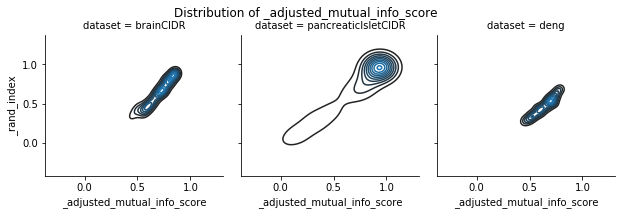

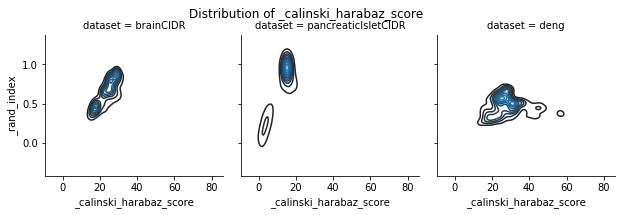

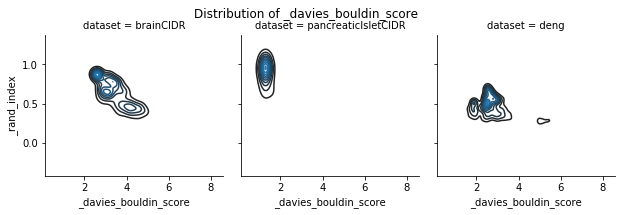

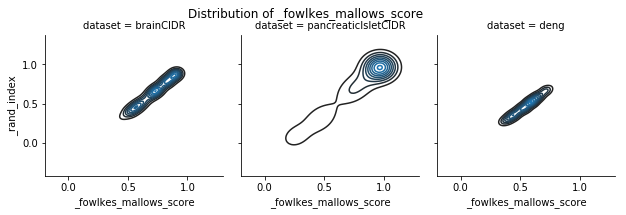

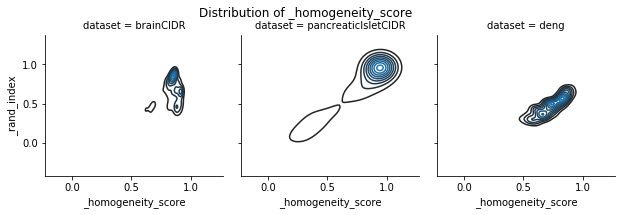

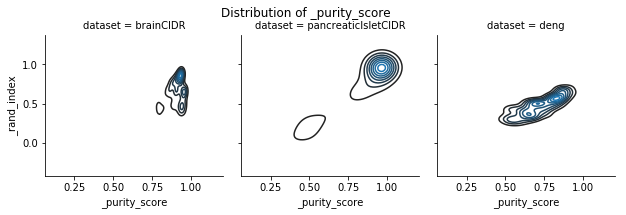

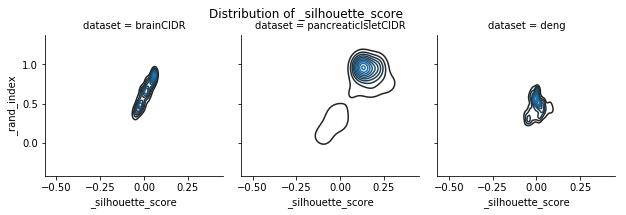

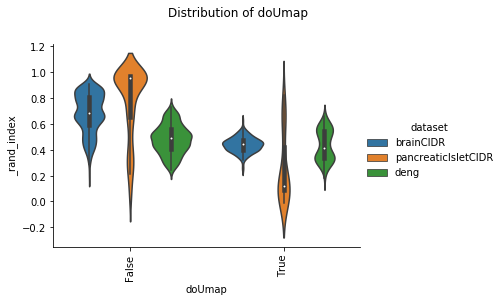

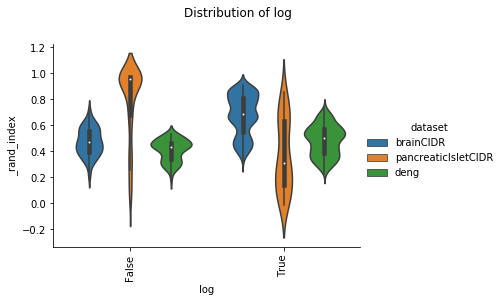

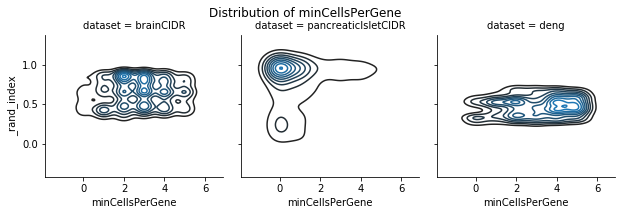

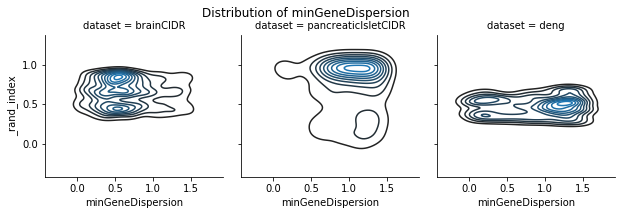

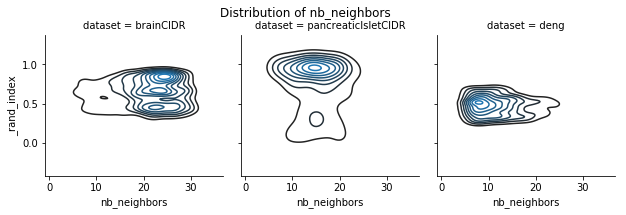

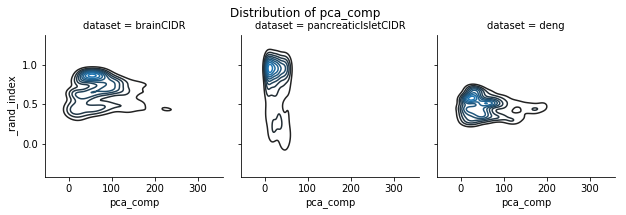

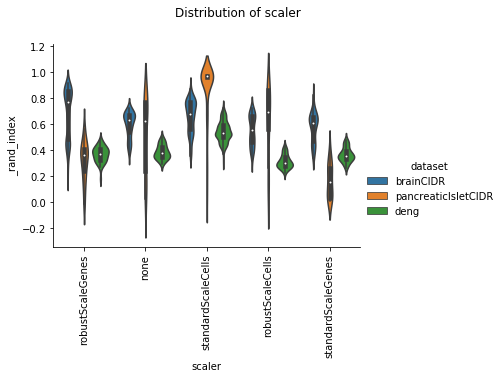

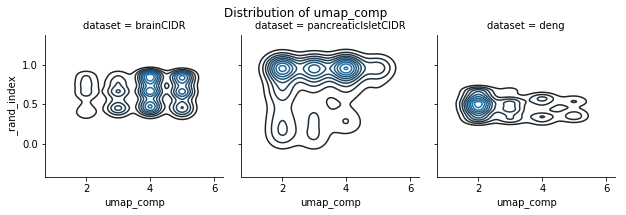

In [70]:


plotResults(results)